In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import interpolation as inter
from skimage.filters import gaussian
from scipy.signal import convolve2d
from contour_sort import *
from fix_image_orientation import *
from crop_image import *
from paper_extraction import *
from commonfunctions import *
from skimage.feature import canny
from skimage.morphology import binary_erosion, binary_dilation, binary_closing,skeletonize, thin
from imutils import contours as imcnts

In [2]:
img = cv2.imread('../../Results/Results/10/4/6.jpg')

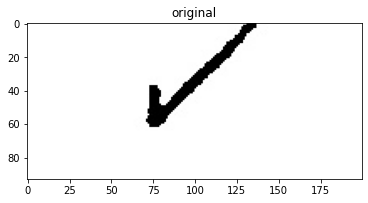

In [3]:
show_images([img], ['original'])

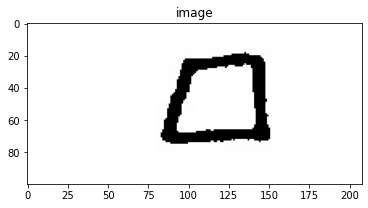

0


In [4]:
def detact_square(img):
    ret, img = cv2.threshold(img, 127, 255, 0)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img=np.invert(img)

    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    img = cv2.erode(img, kernel, iterations=2)
    
    kernel_length = np.array(img).shape[1]//20
    verticle_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_length))

    hori_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_length, 1))
    verticle_lines_img = cv2.erode(img, verticle_kernel, iterations=2)
    verticle_lines_img = cv2.dilate(verticle_lines_img, verticle_kernel, iterations=6)
    lines_ver = cv2.HoughLinesP(verticle_lines_img,2,np.pi/180,40,minLineLength=5,maxLineGap=10)
    if not(lines_ver is None):
        for line  in lines_ver:
            for x1, y1, x2, y2 in line:

                 verticle_lines_img=cv2.line(verticle_lines_img,(x1,0),(x2,verticle_lines_img.shape[0]),(255,255,255),1)
  
   
    
    
    horizontal_lines_img = cv2.erode(img, hori_kernel, iterations=2)
    horizontal_lines_img = cv2.dilate(horizontal_lines_img, hori_kernel, iterations=6)
    
    
    lines_hor = cv2.HoughLinesP(horizontal_lines_img,2,np.pi/180,40,minLineLength=5,maxLineGap=10)
    if not(lines_hor is None):
        for line  in lines_hor:
            for x1, y1, x2, y2 in line:

                horizontal_lines_img=cv2.line(horizontal_lines_img,(0,y1),(horizontal_lines_img.shape[1],y2),(255,255,255),1)
  
    img_final_bin=cv2.bitwise_and(verticle_lines_img, horizontal_lines_img)
    img_final_bin = cv2.dilate(img_final_bin, hori_kernel, iterations=3)
    
    
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2,2))
    img_final_bin = cv2.dilate(img_final_bin, kernel, iterations=2)
 
    cnt = cv2.findContours(img_final_bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[0]
    if(len(cnt)==4):
        
        return ( 0)
    else:
        return (-1)

img = cv2.imread('../../Results/Results/2/5/11.jpg')
show_images([img],['image'])
out =detact_square(img)
print(out)

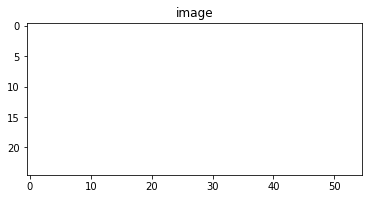

-1


In [5]:
def deatact_Vertical_lines(img):
    ret, img = cv2.threshold(img, 127, 255, 0)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img=np.invert(img)
    kernel_length = np.array(img).shape[1]//20
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    img = cv2.erode(img, kernel, iterations=2)
    hori_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_length, 1))
    horizontal_lines_img = cv2.erode(img, hori_kernel, iterations=2)
    horizontal_lines_img = cv2.dilate(horizontal_lines_img, hori_kernel, iterations=6)
    
    
    lines_hor = cv2.HoughLinesP(horizontal_lines_img,2,np.pi/180,40,minLineLength=5,maxLineGap=10)
    if not(lines_hor is None):
        return -1; 
    contours = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[0]
    if(len(contours) == 0):
        return -1
    return len(contours);
img = cv2.imread('../../Results/Results/3/5/16.jpg')
show_images([img],['image'])
out =deatact_Vertical_lines(img)
print(out)

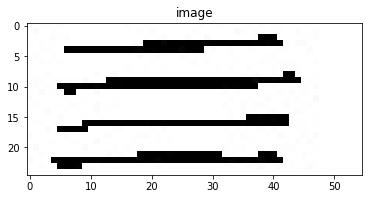

5


In [6]:
def deatact_Horizontal_lines(img):
    ret, img = cv2.threshold(img, 127, 255, 0)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img=np.invert(img)
  
    kernel_length = np.array(img).shape[1]//20
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    img = cv2.erode(img, kernel, iterations=2)
    verticle_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_length))
    
    verticle_lines_img = cv2.erode(img, verticle_kernel, iterations=2)
    verticle_lines_img = cv2.dilate(verticle_lines_img, verticle_kernel, iterations=6)
    lines_ver = cv2.HoughLinesP(verticle_lines_img,2,np.pi/180,40,minLineLength=10,maxLineGap=10)
    if not(lines_ver is None):
        return -1; 
    contours = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[0]
    number=len(contours)
  
    if(number == 1):
        x1, y1, w1, h1 = cv2.boundingRect(contours[0])
        if(w1> img.shape[1]//2):
            return 5-number;
        else:
            return 0; 
    else:
        return 5-number;
    
img = cv2.imread('../../Results/Results/3/5/2.jpg')
show_images([img],['image'])
out =deatact_Horizontal_lines(img)
print(out)

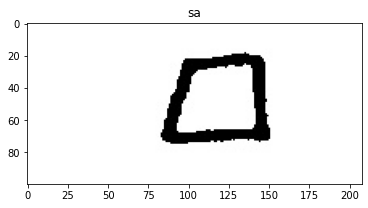

-1


In [7]:
def deatact_Empty_cell(img):
    ret, img = cv2.threshold(img, 127, 255, 0)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img=np.invert(img)
  
   
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    img = cv2.erode(img, kernel, iterations=2)

    contours = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[0]
    number=len(contours)
    if(number == 0):
        return 'empty cell'; 
    else:
        return -1;
    
img = cv2.imread('../../Results/Results/2/5/11.jpg')
show_images([img],['sa'])
out =deatact_Empty_cell(img)
print(out)

In [8]:
colors=[(255,0,0)
,(0,255,0)
,(0,0,255)
,(255,255,192)
,(0,128,128)
,(255,215,0)
,(255,0,0)
,(0,255,0)
,(0,0,255)
,(0,255,0)
,(255,0,0)

,(225,255,128)
,(128,0,0)
,(128,128,0)
,(0,128,0)
,(128,0,128)

,(0,0,128)
,(255,215,0)]

In [9]:
import pytesseract

dataframe_final=[]
img = cv2.imread('../../Results/Results/10/3/10.jpg')
# hsv_image = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# mask = cv2.inRange(hsv_image, array([0, 0, 0]), array([165, 10, 255]))
# kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 3))
# dilate = cv2.dilate(mask, kernel, iterations=1)
# thresh = cv2.bitwise_and(dilate, mask)
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract'
custom_config = '-c tessedit_char_whitelist=0123456789'
# out = pytesseract.image_to_string(img ,lang='eng',config='--psm 10 --oem 3 ')
out = pytesseract.image_to_string(img ,lang='eng',config='outputbase digits --dpi 300 --psm 13')
dataframe_final.append(out)
print(dataframe_final)

['']


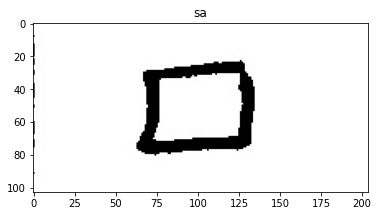

True


C:\Users\Eslam Ashraf\AppData\Local\Temp\ipykernel_40140\3710507036.py:36: RuntimeWarning: divide by zero encountered in int_scalars
  slopes.append((y2-y1)/(x2-x1))
C:\Users\Eslam Ashraf\AppData\Local\Temp\ipykernel_40140\3710507036.py:36: RuntimeWarning: invalid value encountered in int_scalars
  slopes.append((y2-y1)/(x2-x1))


In [10]:
def filter_squares_from_check_mark(img):
    pap_cnts,_=cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    check_mark_cnts,_=imcnts.sort_contours(pap_cnts,method='top-to-bottom')
    cnt = check_mark_cnts[0]
    peri = cv2.arcLength(cnt, True)
    check_mark_cnt_area=cv2.contourArea(cnt)
    return check_mark_cnt_area>1.5*peri

def detect_check_mark(img):
    temp=np.zeros_like(img)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img=cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
             cv2.THRESH_BINARY_INV, 51, 15)
 
    
    img_copy=img.copy()
    img=skeletonize(img,method='lee')
    
    # Filter Question Mark
    is_question_mark = cv2.HoughLinesP(img,1,np.pi/300,threshold=25,maxLineGap=15)
    if(is_question_mark is None):
        #print(f'{num} Failed With Filter Question Mark')
        return False
    
    # Filter Squares
    img_copy=cv2.dilate(img_copy, np.ones((5,5)), iterations=1)
    img_copy=skeletonize(img_copy,method='lee')
    if(filter_squares_from_check_mark(img) or filter_squares_from_check_mark(img_copy)):
        #print(f'{num} Failed With Filter Squares')
        return False
    
    lines = cv2.HoughLinesP(img,1,np.pi/300,threshold=4,maxLineGap=20)
    slopes=[]
    for index,line  in enumerate(lines):
        for x1, y1, x2, y2 in line:
            slopes.append((y2-y1)/(x2-x1))
            temp=cv2.line(temp,(x1,y1),(x2,y2),colors[index%len(colors)],1)
    slopes=np.sort(np.degrees(np.arctan(slopes)))
    ver_error=(slopes>=-90) & (slopes<=-83)
    slopes[ver_error]*=-1
    pos_ang=slopes[slopes>0]
    neg_ang=np.abs(slopes[slopes<0])
#     show_images([img], ['original'])
#     show_images([temp], ['temp'])


    # Filter Check Mark
    if(not len(pos_ang) or not len(neg_ang)):
        if(len(slopes)<2):
            #print(f'{num} Failed With Filter Check Marks')
            return False
        right_line = np.amax(slopes)
        left_line = np.amin(slopes)
        diff_ang=right_line-left_line 
        return diff_ang>30 and diff_ang<100
    else:
        right_line = np.mean(neg_ang) if len(neg_ang)<=2 else np.median(neg_ang) 
        left_line = np.mean(pos_ang) if len(pos_ang)<=2 else np.median(pos_ang)
        diff_ang=left_line+right_line 
        return diff_ang>80 and diff_ang<150
    
img = cv2.imread('../../Results/Results/13/5/10.jpg')
show_images([img],['sa'])
print(detect_check_mark(img))

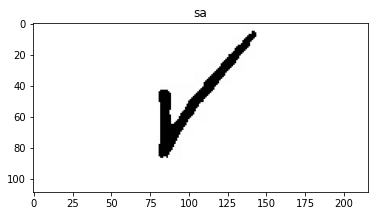

False


In [11]:
def detect_question_mark(img):
    img = cv2.bilateralFilter(img, 20, 30, 30)

    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    img= cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
             cv2.THRESH_BINARY_INV, 51, 15)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    img = cv2.erode(img, kernel, iterations=2)
    img=skeletonize(img,method='lee')
    
    kernel = np.ones((4,4),np.uint8)
    kernel2 = np.ones((1,1),np.uint8)
    # img = cv2.dilate(img.copy(), kernel, 5)
    # img = cv2.erode(img.copy(), kernel, 5)
    # img = cv2.medianBlur(img,5)
    rows = img.shape[0]

#     show_images([img])
    # img = 255-img
    lines_ver = cv2.HoughLinesP(img,1,np.pi/300,threshold=25,maxLineGap=15)
    circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, rows/8,
                               param1=30, param2= 10,
                               minRadius=10, maxRadius=20)
    
#     print(lines_ver)
#     print(circles)
    if circles is None:
        rows+=1
    else:
        circles = np.uint16(np.around(circles))
        
        pap_cnts,_=cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
        question_cnts,_=imcnts.sort_contours(pap_cnts,method='top-to-bottom')
#         cv2.drawContours(orig,[question_cnts[0]],-1,(0,255,0), 5)
        cnt = question_cnts[0]
        (x,y,w,h)=cv2.boundingRect(cnt)
        aspect_ratio=w/h
        peri = cv2.arcLength(cnt, True)
        if(cv2.contourArea(cnt)<1.5*peri):
            return True;
        
    return False;
    
img = cv2.imread('../../Results/Results/11/4/5.jpg')
show_images([img],['sa'])
print(detect_question_mark(img))